# Statistische kwaliteitscontrole

![quality](quality.jpg)

## Situatie

De firma Glow BV produceert lampen.

- Bekend is dat **2%** van de productie defecten bevat
- De dagproductie bestaat uit **75.000 lampen**

## Opdracht

- Onderzoek hoeveel kapotte lampen je tegenkomt als je **25 lampen** uit de totale dagproductie inspecteert
- Voer de inspectie **10 maal** uit
- Maak een kort overzicht van je bevindingen (in Excel, met MatplotLib of met print-statements)

Begin met de analyse hieronder.

## Stap 1: analyseren

- Bedenk hoe je de productie en de productiefout simuleert (zie stap 2 voor een hint)

- Bedenk hoe het inspectieproces verloopt
Er wordt random, om de zoveel geproduceerde lampen, een lamp uitgekozen om te testen. Hierbij kan je de interval (binnen een te bepalen bandbreedte) random laten genereren. De lamp wordt genummerd en getest.

**Hint**: zitten er functies in de [random module](https://www.w3schools.com/python/module_random.asp) die passen bij deze opdracht?

## Stap 2: schetsen

Werk op basis van je analyse stapsgewijs een oplossing uit, bijvoorbeeld:

In [10]:
# 1. Genereer een lijst met functionele lampen (hoeveel?)
# Maak een lijst van 73.500 hele lampen
# Maak een lijst van 1.500 kapotte lampen
# Combineer beide lijst
import random

ones = [1] * 73500
zeros = [0] * 1500
combined_list = ones + zeros
random.shuffle(combined_list)
print(combined_list[:10])
# print(combined_list[:-5])

# Kies een aantal batchsizes die je gaat analyseren
Batchsize 25, 100, 250, 1000, 2000
# 2. Vul de lijst aan met defecte lampen (hoeveel?)

# ...

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


- Als bovenstaande niet lukt dan zal het implementeren ook niet lukken...
- Vraag om hulp, maar oefen eerst met het uitwerken van een oplossing

## Stap 3: implementeren

- Werk de bovenstaande schets stap voor stap uit
- Begin pas met implementeren als de schets klopt

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


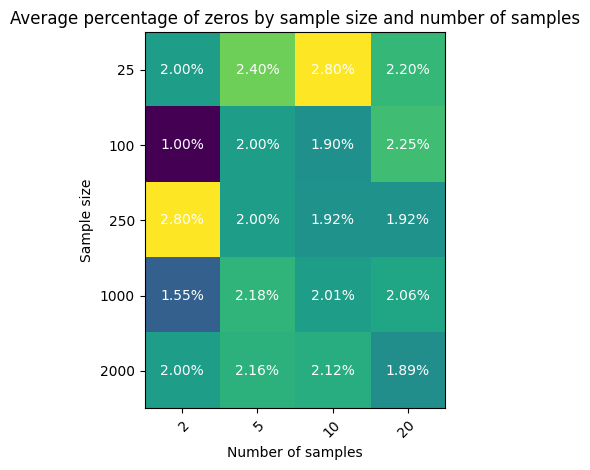

In [23]:
# Stappenplan schets

# Implementatie
import random
import matplotlib.pyplot as plt

ones = [1] * 73500
zeros = [0] * 1500
combined_list = ones + zeros
random.shuffle(combined_list)
print(combined_list[:150])

sample_sizes = [25, 100, 250, 1000, 2000]
num_samples = [2, 5, 10, 20]

data = []
for sample_size in sample_sizes:
    row = []
    for n in num_samples:
        percentages = []
        for i in range(n):
            sample = random.sample(combined_list, sample_size)
            percentage = sample.count(0) / sample_size * 100
            percentages.append(percentage)

        average_percentage = sum(percentages) / len(percentages)
        row.append(average_percentage)
    data.append(row)
    
fig, ax = plt.subplots()
im = ax.imshow(data)

ax.set_xticks(range(len(num_samples)))
ax.set_yticks(range(len(sample_sizes)))
ax.set_xticklabels(num_samples)
ax.set_yticklabels(sample_sizes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(sample_sizes)):
    for j in range(len(num_samples)):
        text = ax.text(j, i, f"{data[i][j]:.2f}%", ha="center", va="center", color="w")

ax.set_title("Average percentage of zeros by sample size and number of samples")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Sample size")
fig.tight_layout()
plt.show()


## Stap 4: reflecteren

1. (a) Komt het gemiddelde van je inspectie overeen met de daadwerkelijke productiefout? - Ja

   (b) Zo nee: hoeveel inspecties moet je dan doen om in de buurt te komen van de 2%? - zie heatmap

2. (a) Is het verstandig om kosten te drukken en maar 5 inspecties uit te voeren? Indien je initiele testen, om de 2% vast te stellen gedaan zijn obv grote sample kan je met kleine/geen inspecties toe. Het is nl niet het doel om defectie lampen eruit te halen.

   (b) Of per inspectie slechts 15 lampen te onderzoeken? zie 2 a

3. (a) Maakt het uit of je de lampen na inspectie terugstopt in de batch?

   (b) Kun je dit aantonen met je simulatie?

In [3]:
# Bewijs / uitwerkingen

# ...

## Extra: variatie in productiefout

De aanname is dat 2% van de productie defecten bevat, maar dit is slechts een **gemiddelde** is. Soms is het 3% dan weer 2% of zelfs 5%. De productiefout hangt namelijk weer af van de productiefout in de onderdelen waaruit de lamp is opgebouwd.

- Breid je model uit waarin je de productiefout laat varieren met 1%
- Maak dit voor de inspectie uit?

In [4]:
# Uitbreiding

# ...

## Extra: Bayesiaanse statistiek

In de bijlage vind je een csv bestand met daarin een onbekend aantal lampen waarvan er een aantal stuk zijn.

1. Lees het bestand in en achterhaal met een aantal inspecties wat het percentage defecte lampen moet zijn

2. Controleer daarna of dit juist was door de totale lijst met lampen te analyseren

Bovenstaande is een voorbeeld van Baysiaanse statistiek.